In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import os
import seaborn as sns
import pickle
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
os.chdir('drive/MyDrive/William_2022/DATASETS')

In [ ]:
!ls

drive  sample_data


In [ ]:
%load_ext tensorboard
%tensorboard --logdir=trans_encoder_2_KEMO/runs_single_text

In [ ]:
%tensorboard --logdir=trans_encoder_2_KEMO/runs_fusion

In [ ]:
for i in os.listdir('zuco_sent'):
  if '.' not in i:
    print(i)
    for j in sorted(os.listdir(f'zuco_sent/{i}')):
      name = j[6:12]
      print(j)

In [ ]:
!ls

In [ ]:
#text
text_acc = pd.read_csv('zuco_sent/text/run-01text-tag-Accuracy.csv')
text_loss = pd.read_csv('zuco_sent/text/run-01text-tag-Loss.csv')


#DCCA text
dcca_text_acc = pd.read_csv('zuco_sent/text/run-02dccatext-tag-Accuracy.csv')
dcca_text_loss = pd.read_csv('zuco_sent/text/run-02dccatext-tag-Loss.csv')

#WD text
wd_text_acc = pd.read_csv('zuco_sent/text/run-04wdtext-tag-Accuracy.csv')
wd_text_loss = pd.read_csv('zuco_sent/text/run-04wdtext-tag-Loss.csv')

#CS text
cs_text_acc = pd.read_csv('zuco_sent/text/run-03cstext-tag-Accuracy.csv')
cs_text_loss = pd.read_csv('zuco_sent/text/run-03cstext-tag-Loss.csv')

# -----------

#eeg
eeg_acc = pd.read_csv('zuco_sent/eeg/run-01eeg-tag-Accuracy.csv')
eeg_loss = pd.read_csv('zuco_sent/eeg/run-01eeg-tag-Loss.csv')


#DCCA eeg
dcca_eeg_acc = pd.read_csv('zuco_sent/eeg/run-02dccaeeg-tag-Accuracy.csv')
dcca_eeg_loss = pd.read_csv('zuco_sent/eeg/run-02dccaeeg-tag-Loss.csv')

#WD eeg
wd_eeg_acc = pd.read_csv('zuco_sent/eeg/run-04wdeeg-tag-Accuracy.csv')
wd_eeg_loss = pd.read_csv('zuco_sent/eeg/run-04wdeeg-tag-Loss.csv')

#CS eeg
cs_eeg_acc = pd.read_csv('zuco_sent/eeg/run-03cseeg-tag-Accuracy.csv')
cs_eeg_loss = pd.read_csv('zuco_sent/eeg/run-03cseeg-tag-Loss.csv')

# -----------

#fusion
fusion_acc = pd.read_csv('zuco_sent/fusion/run-01fusion-tag-Accuracy.csv')
fusion_loss = pd.read_csv('zuco_sent/fusion/run-01fusion-tag-Loss.csv')


#DCCA fusion
dcca_fusion_acc = pd.read_csv('zuco_sent/fusion/run-02DCCA-tag-Accuracy.csv')
dcca_fusion_loss = pd.read_csv('zuco_sent/fusion/run-02DCCA-tag-Loss.csv')

#WD fusion
wd_fusion_acc = pd.read_csv('zuco_sent/fusion/run-04wd-tag-Accuracy.csv')
wd_fusion_loss = pd.read_csv('zuco_sent/fusion/run-04wd-tag-Loss.csv')

#CS fusion
cs_fusion_acc = pd.read_csv('zuco_sent/fusion/run-03cs-tag-Accuracy.csv')
cs_fusion_loss = pd.read_csv('zuco_sent/fusion/run-03cs-tag-Loss.csv')

In [ ]:
#text
text_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_relation/baselines/text/text_acc_loss.csv')


#DCCA text
dcca_text_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_relation/baselines/eeg/eeg_acc_loss.csv')

#WD text
wd_text_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_relation/baselines/fusion_wd_ds/wd_text_acc_loss.csv')

#CS text
cs_text_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_relation/baselines/fusion_cossim_ds/cs_text_acc_loss.csv')

# -----------

#eeg
eeg_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_relation/baselines/eeg/eeg_acc_loss.csv')


#DCCA eeg
dcca_eeg_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_relation/baselines/DCCA_ds/dcca_eeg_acc_loss.csv')

#WD eeg
wd_eeg_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_relation/baselines/fusion_wd_ds/wd_eeg_acc_loss.csv')

#CS eeg
cs_eeg_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_relation/baselines/fusion_cossim_ds/cs_eeg_acc_loss.csv')

# -----------

#fusion
fusion_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_relation/baselines/text_eeg_fusion/fusion_acc_loss.csv')


#DCCA fusion
dcca_fusion_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_relation/baselines/DCCA_fusion/dcca_fusion_acc_loss.csv')

#WD fusion
wd_fusion_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_relation/baselines/fusion_wd/fusion_wd_acc_loss.csv')

#CS fusion
cs_fusion_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_relation/baselines/fusion_cossim/cs_fusion_acc_loss.csv')


In [ ]:
#text
text_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/trans_encoder_2_KEMO_bin/baselines/text/text_acc_loss.csv')


#DCCA text
dcca_text_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/trans_encoder_2_KEMO_bin/baselines/DCCA_ds/DCCA_text_acc_loss.csv')

#WD text
wd_text_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/trans_encoder_2_KEMO_bin/baselines/fusion_wd_ds/wd_text_acc_loss.csv')

#CS text
cs_text_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/trans_encoder_2_KEMO_bin/baselines/fusion_cossim_ds/cs_text_acc_loss.csv')

# -----------

#eeg
eeg_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/trans_encoder_2_KEMO_bin/baselines/eeg/eeg_acc_loss.csv')


#DCCA eeg
dcca_eeg_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/trans_encoder_2_KEMO_bin/baselines/DCCA_ds/DCCA_eeg_acc_loss.csv')

#WD eeg
wd_eeg_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/trans_encoder_2_KEMO_bin/baselines/fusion_wd_ds/wd_eeg_acc_loss.csv')

#CS eeg
cs_eeg_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/trans_encoder_2_KEMO_bin/baselines/fusion_cossim_ds/cs_eeg_acc_loss.csv')

# -----------

#fusion
fusion_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/trans_encoder_2_KEMO_bin/baselines/text_eeg_fusion/fusion_acc_loss.csv')


#DCCA fusion
dcca_fusion_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/trans_encoder_2_KEMO_bin/baselines/DCCA_fusion/DCCA_fusion_acc_loss.csv')

#WD fusion
wd_fusion_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/trans_encoder_2_KEMO_bin/baselines/fusion_wd/fusion_wd_acc_loss.csv')

#CS fusion
cs_fusion_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/trans_encoder_2_KEMO_bin/baselines/fusion_cossim/fusion_cs_acc_loss.csv')


In [44]:
#text
text_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word_concat/baselines/text/text_acc_loss.csv')


#DCCA text
dcca_text_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word_concat/baselines/DCCA_ds/dcca_text_acc_loss.csv')

#WD text
wd_text_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word_concat/baselines/fusion_wd_ds/wd_text_acc_loss.csv')

#CS text

# -----------

#eeg
eeg_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word_concat/baselines/eeg/eeg_acc_loss.csv')


#DCCA eeg
dcca_eeg_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word_concat/baselines/DCCA_ds/dcca_eeg_acc_loss.csv')

#WD eeg
wd_eeg_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word_concat/baselines/fusion_wd_ds/wd_eeg_acc_loss.csv')

#CS eeg

# -----------

#fusion
fusion_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word_concat/baselines/text_eeg_fusion/fusion_acc_loss.csv')


#DCCA fusion
dcca_fusion_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word_concat/baselines/DCCA_fusion/dcca_fusion_acc_loss.csv')

#WD fusion
wd_fusion_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word_concat/baselines/fusion_wd/wd_acc_loss.csv')

#CS fusion


In [46]:
#text
text_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word/baselines/text/text_acc_loss.csv')


#DCCA text
dcca_text_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word/baselines/DCCA_ds/dcca_text_acc_loss.csv')

#WD text
wd_text_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word/baselines/fusion_wd_ds/wd_text_acc_loss.csv')

#CS text

# -----------

#eeg
eeg_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word/baselines/eeg/eeg_acc_loss.csv')


#DCCA eeg
dcca_eeg_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word/baselines/DCCA_ds/dcca_eeg_acc_loss.csv')

#WD eeg
wd_eeg_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word/baselines/fusion_wd_ds/wd_eeg_acc_loss.csv')

#CS eeg

# -----------

#fusion
fusion_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word/baselines/text_eeg_fusion/fusion_acc_loss.csv')


#DCCA fusion
dcca_fusion_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word/baselines/DCCA_fusion/dcca_fusion_acc_loss.csv')

#WD fusion
wd_fusion_acc = pd.read_csv('/content/drive/MyDrive/William_2022/DATASETS/main_trans_ZuCo_word/baselines/fusion_wd/wd_acc_loss.csv')

#CS fusion


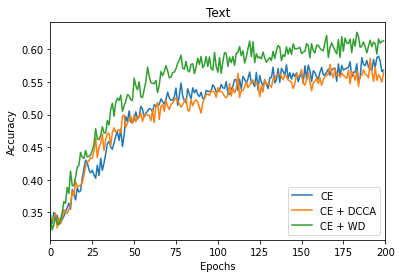

In [47]:
fig1 = plt.figure('Figure 1')
plt.plot(text_acc['epoch'], text_acc['train_acc'], label = 'CE')
plt.plot(dcca_text_acc['epoch'], dcca_text_acc['train_acc'], label = 'CE + DCCA')
plt.plot(wd_text_acc['epoch'], wd_text_acc['train_acc'], label = 'CE + WD')
# plt.plot(cs_text_acc['epoch'], cs_text_acc['train_acc'], label = 'CE + CS')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Text')
# plt.ylim([0.0, 1])
plt.xlim([0, 200])
plt.legend()
plt.show()
fig1.savefig('text_acc.png')

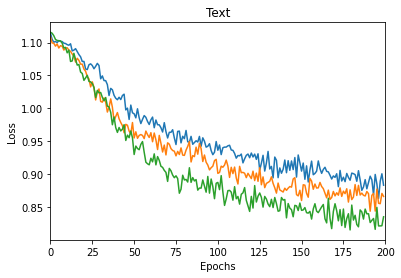

In [48]:
fig2 = plt.figure('Figure 2')
plt.plot(text_acc['epoch'], text_acc['train_loss'], label = 'CE')
plt.plot(dcca_text_acc['epoch'], dcca_text_acc['train_loss'], label = 'CE + DCCA')
plt.plot(wd_text_acc['epoch'], wd_text_acc['train_loss'], label = 'CE + WD')
# plt.plot(cs_text_acc['epoch'], cs_text_acc['train_loss'], label = 'CE + CS')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Text')
# plt.ylim([0, 2])
plt.xlim([0, 200])
plt.show()
fig2.savefig('text_loss.png')

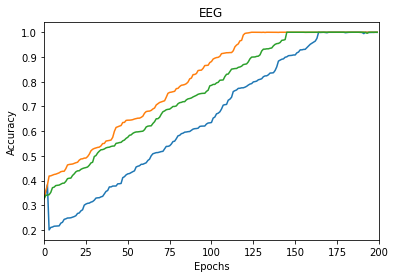

In [49]:
fig3 = plt.figure('Figure 3')
plt.plot(eeg_acc['epoch'], eeg_acc['train_acc'], label = 'CE')
plt.plot(dcca_eeg_acc['epoch'], dcca_eeg_acc['train_acc'], label = 'CE + DCCA')
plt.plot(wd_eeg_acc['epoch'], wd_eeg_acc['train_acc'], label = 'CE + WD')
# plt.plot(cs_eeg_acc['epoch'], cs_eeg_acc['train_acc'], label = 'CE + CS')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('EEG')
# plt.ylim([0.0, 1])
plt.xlim([0, 200])
plt.show()
fig3.savefig('eeg_acc.png')

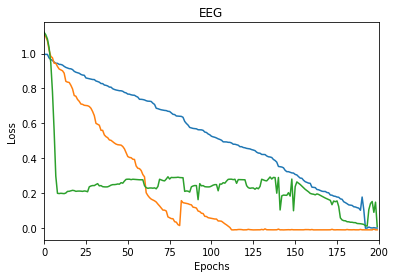

In [50]:
fig4 = plt.figure('Figure 4')
plt.plot(eeg_acc['epoch'], eeg_acc['train_loss'], label = 'CE')
plt.plot(dcca_eeg_acc['epoch'], dcca_eeg_acc['train_loss'], label = 'CE + DCCA')
plt.plot(wd_eeg_acc['epoch'], wd_eeg_acc['train_loss'], label = 'CE + WD')
# plt.plot(cs_eeg_acc['epoch'], cs_eeg_acc['train_loss'], label = 'CE + CS')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('EEG')
# plt.ylim([0, 2])
plt.xlim([0, 200])
plt.show()
fig4.savefig('eeg_loss.png')

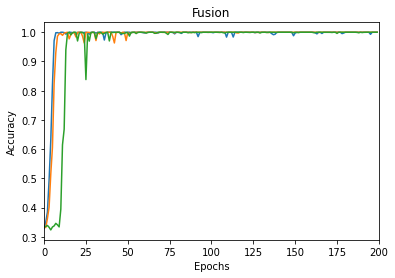

In [51]:
fig5 = plt.figure('Figure 5')
plt.plot(fusion_acc['epoch'], fusion_acc['train_acc'], label = 'CE')
plt.plot(dcca_fusion_acc['epoch'], dcca_fusion_acc['train_acc'], label = 'CE + DCCA')
plt.plot(wd_fusion_acc['epoch'], wd_fusion_acc['train_acc'], label = 'CE + WD')
# plt.plot(cs_fusion_acc['epoch'], cs_fusion_acc['train_acc'], label = 'CE + CS')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Fusion')
# plt.ylim([0.0, 1])
plt.xlim([0, 200])
plt.show()
fig5.savefig('fusion_acc.png')

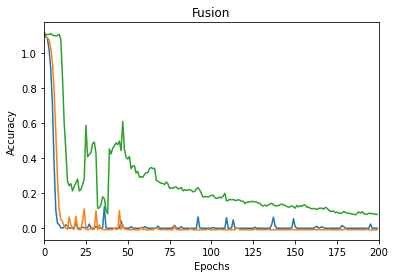

In [52]:
fig6 = plt.figure('Figure 6')
plt.plot(fusion_acc['epoch'], fusion_acc['train_loss'], label = 'CE')
plt.plot(dcca_fusion_acc['epoch'], dcca_fusion_acc['train_loss'], label = 'CE + DCCA')
plt.plot(wd_fusion_acc['epoch'], wd_fusion_acc['train_loss'], label = 'CE + WD')
# plt.plot(cs_fusion_acc['epoch'], cs_fusion_acc['train_loss'], label = 'CE + CS')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Fusion')
# plt.ylim([1, 0])
plt.xlim([0, 200])
plt.show()
fig6.savefig('fusion_loss.png')

In [ ]:
"for i in os.listdir('kemo'):
  if '.' not in i:
    # print(i)
    for j in sorted(os.listdir(f'kemo/{i}')):
      name = j[6:12]
      print(j)

SyntaxError: ignored

In [ ]:
#text
text_acc = pd.read_csv('zuco_sent/text/run-01text-tag-Accuracy.csv')
text_loss = pd.read_csv('zuco_sent/text/run-01text-tag-Loss.csv')


#DCCA text
dcca_text_acc = pd.read_csv('zuco_sent/text/run-02dccatext-tag-Accuracy.csv')
dcca_text_loss = pd.read_csv('zuco_sent/text/run-02dccatext-tag-Loss.csv')

#WD text
wd_text_acc = pd.read_csv('zuco_sent/text/run-04wdtext-tag-Accuracy.csv')
wd_text_loss = pd.read_csv('zuco_sent/text/run-04wdtext-tag-Loss.csv')

#CS text
cs_text_acc = pd.read_csv('zuco_sent/text/run-03cstext-tag-Accuracy.csv')
cs_text_loss = pd.read_csv('zuco_sent/text/run-03cstext-tag-Loss.csv')

# -----------

#eeg
eeg_acc = pd.read_csv('zuco_sent/eeg/run-01eeg-tag-Accuracy.csv')
eeg_loss = pd.read_csv('zuco_sent/eeg/run-01eeg-tag-Loss.csv')


#DCCA eeg
dcca_eeg_acc = pd.read_csv('zuco_sent/eeg/run-02dccaeeg-tag-Accuracy.csv')
dcca_eeg_loss = pd.read_csv('zuco_sent/eeg/run-02dccaeeg-tag-Loss.csv')

#WD eeg
wd_eeg_acc = pd.read_csv('zuco_sent/eeg/run-04wdeeg-tag-Accuracy.csv')
wd_eeg_loss = pd.read_csv('zuco_sent/eeg/run-04wdeeg-tag-Loss.csv')

#CS eeg
cs_eeg_acc = pd.read_csv('zuco_sent/eeg/run-03cseeg-tag-Accuracy.csv')
cs_eeg_loss = pd.read_csv('zuco_sent/eeg/run-03cseeg-tag-Loss.csv')

# -----------

#fusion
fusion_acc = pd.read_csv('zuco_sent/fusion/run-01fusion-tag-Accuracy.csv')
fusion_loss = pd.read_csv('zuco_sent/fusion/run-01fusion-tag-Loss.csv')


#DCCA fusion
dcca_fusion_acc = pd.read_csv('zuco_sent/fusion/run-02DCCA-tag-Accuracy.csv')
dcca_fusion_loss = pd.read_csv('zuco_sent/fusion/run-02DCCA-tag-Loss.csv')

#WD fusion
wd_fusion_acc = pd.read_csv('zuco_sent/fusion/run-04wd-tag-Accuracy.csv')
wd_fusion_loss = pd.read_csv('zuco_sent/fusion/run-04wd-tag-Loss.csv')

#CS fusion
cs_fusion_acc = pd.read_csv('zuco_sent/fusion/run-03cs-tag-Accuracy.csv')
cs_fusion_loss = pd.read_csv('zuco_sent/fusion/run-03cs-tag-Loss.csv')

# connectivity

In [ ]:
df = pd.read_csv('ZAB_word.csv')
df = df.iloc[:, 0:105]

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,won,0.868159,1.263736,1.560536,0.574414,0.543198,0.351508,1.091448,1.155339,1.060086,...,0.239240,0.402886,0.343262,0.452932,0.906335,0.735058,0.153672,0.577588,1.029127,1.005676
1,Gold,0.525964,0.691598,1.300529,0.462093,0.482663,0.360886,0.564407,0.826765,0.760042,...,1.318991,0.297962,0.318204,0.203745,0.396608,2.273029,0.771871,0.288193,0.361733,0.501090
2,Medal,0.396902,0.431885,0.380328,0.246922,0.582633,0.907333,0.229168,0.329983,0.410759,...,0.587484,0.353059,0.407220,0.282638,0.463129,0.850482,0.407545,0.397563,0.549371,0.513280
3,the,1.117982,1.391729,0.836791,0.460604,0.187865,0.173161,0.526309,0.538851,0.204099,...,0.871358,0.766263,0.827463,0.745597,1.131392,0.988003,0.645307,0.939862,1.395577,1.226282
4,Royal,0.904205,1.163099,1.425935,0.542196,0.242432,0.196715,0.547144,0.603447,0.390364,...,0.387079,0.498895,0.339440,0.402391,0.584040,1.163736,0.321973,0.543420,0.738761,0.668613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910,Marie,1.415183,1.584692,2.827823,1.026493,0.158506,0.704816,0.148079,0.708348,0.291400,...,0.758041,1.232277,0.970544,1.411654,1.608972,0.609621,0.415003,1.045239,1.435041,1.698602
3911,Presley,0.826312,1.241091,2.024321,0.540495,0.233159,0.383903,0.189398,0.371254,0.546078,...,0.609492,1.093705,0.931932,1.187847,1.244415,0.652773,0.156144,1.078853,1.230577,1.380655
3912,filed,0.661653,0.656360,1.321730,0.743107,1.015014,0.782182,0.268256,0.552891,1.771449,...,0.982675,0.861060,0.808619,0.883015,0.837136,0.943852,1.002818,0.671060,0.842577,0.947251
3913,divorce,0.606635,0.472100,1.315987,0.942840,0.572043,0.219258,0.196366,0.630036,1.140373,...,1.170796,1.654229,0.454223,0.471872,0.500678,1.292385,1.868380,1.050522,0.469285,0.550211


In [ ]:
glove_file = 'glove.6B.100d.txt'
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")

In [ ]:
import csv
def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    for line in range(len(File)):
        word = df.iloc[line, 0]
        embedding = np.array(df.iloc[line, 1:-1])
        glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model

In [ ]:
glove_file=load_glove_model(df)

Loading Glove Model
2071 words loaded!


In [ ]:
glove_file['education']

In [ ]:
# glove_file = 'zab_word.txt'
# word2vec_glove_file = get_tmpfile("zab_word.word2vec.txt")
_ = glove2word2vec(glove_file, word2vec_glove_file)

model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

filename = 'glove2word2vec_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
model = pickle.load(open(filename, 'rb'))

In [ ]:
input_word = 'award, education, employer'
user_input = [x.strip() for x in input_word.split(',')]
result_word = []

In [ ]:
def append_list(sim_words, words):
    
    list_of_words = []
    
    for i in range(len(sim_words)):
        
        sim_words_list = list(sim_words[i])
        sim_words_list.append(words)
        sim_words_tuple = tuple(sim_words_list)
        list_of_words.append(sim_words_tuple)
        
    return list_of_words

In [ ]:
for words in user_input:
    
  sim_words = model.most_similar(words, topn = 5)
  sim_words = append_list(sim_words, words)
      
  result_word.extend(sim_words)

In [ ]:
similar_word = [word[0] for word in result_word]
similarity = [word[1] for word in result_word] 
similar_word.extend(user_input)
labels = [word[2] for word in result_word]
label_dict = dict([(y,x+1) for x,y in enumerate(set(labels))])
color_map = [label_dict[x] for x in labels]

In [ ]:
import plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.manifold import TSNE

def display_tsne_scatterplot_3D(model, user_input=None, words=None, label=None, color_map=None, perplexity = 0, learning_rate = 0, iteration = 0, topn=5, sample=10):

    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
    
    word_vectors = np.array([model[w] for w in words])
    
    three_dim = TSNE(n_components = 3, random_state=0, perplexity = perplexity, learning_rate = learning_rate, n_iter = iteration).fit_transform(word_vectors)[:,:3]


    # For 2D, change the three_dim variable into something like two_dim like the following:
    # two_dim = TSNE(n_components = 2, random_state=0, perplexity = perplexity, learning_rate = learning_rate, n_iter = iteration).fit_transform(word_vectors)[:,:2]

    data = []


    count = 0
    for i in range (len(user_input)):

                trace = go.Scatter3d(
                    x = three_dim[count:count+topn,0], 
                    y = three_dim[count:count+topn,1],  
                    z = three_dim[count:count+topn,2],
                    text = words[count:count+topn],
                    name = user_input[i],
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 0.8,
                        'color': 2
                    }
       
                )
                
                # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable. Also, instead of using
                # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
            
                data.append(trace)
                count = count+topn

    trace_input = go.Scatter3d(
                    x = three_dim[count:,0], 
                    y = three_dim[count:,1],  
                    z = three_dim[count:,2],
                    text = words[count:],
                    name = 'input words',
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 1,
                        'color': 'black'
                    }
                    )

    # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable.  Also, instead of using
    # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
            
    data.append(trace_input)
    
# Configure the layout

    layout = go.Layout(
        margin = {'l': 0, 'r': 0, 'b': 0, 't': 0},
        showlegend=True,
        legend=dict(
        x=1,
        y=0.5,
        font=dict(
            family="Courier New",
            size=25,
            color="black"
        )),
        font = dict(
            family = " Courier New ",
            size = 15),
        autosize = False,
        width = 1000,
        height = 1000
        )


    plot_figure = go.Figure(data = data, layout = layout)
    plot_figure.show()
    
display_tsne_scatterplot_3D(model, user_input, similar_word, labels, color_map, 5, 500, 10000)

In [ ]:
words[0:0+5]

'emplo'

In [ ]:

import plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.manifold import TSNE

def display_tsne_scatterplot_3D(model, user_input=None, words=None, label=None, color_map=None, perplexity = 0, learning_rate = 0, iteration = 0, topn=5, sample=10):

    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
    
    word_vectors = np.array([model[w] for w in words])
    
    two_dim = TSNE(n_components = 2, random_state=0, perplexity = perplexity, learning_rate = learning_rate, n_iter = iteration).fit_transform(word_vectors)[:,:2]



    data = []


    count = 0
    for i in range (len(user_input)):

                trace = go.Scatter(
                    x = two_dim[count:count+topn,0], 
                    y = two_dim[count:count+topn,1],  
                    text = words[count:count+topn],
                    name = user_input[i],
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 0.8,
                        'color': 2
                    }
       
                )
                
            
                data.append(trace)
                count = count+topn

    trace_input = go.Scatter(
                    x = two_dim[count:,0], 
                    y = two_dim[count:,1],  
                    text = words[count:],
                    name = 'input words',
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 1,
                        'color': 'black'
                    }
                    )

            
    data.append(trace_input)
    

    layout = go.Layout(
        margin = {'l': 0, 'r': 0, 'b': 0, 't': 0},
        showlegend=True,
        legend=dict(
        x=1,
        y=0.5,
        font=dict(
            family="Courier New",
            size=25,
            color="black"
        )),
        font = dict(
            family = " Courier New ",
            size = 15),
        autosize = False,
        width = 1000,
        height = 1000
        )


    plot_figure = go.Figure(data = data, layout = layout)
    plot_figure.show()
    
display_tsne_scatterplot_3D(model, user_input = user_input, words = similar_word,label = labels, color_map = color_map, perplexity = 5, learning_rate = 500, iteration = 10000)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



In [ ]:
df = pd.read_csv('ZAB_word.csv')

In [ ]:
small = df.iloc[0:10, 1:-1]

In [ ]:
similar_words

NameError: ignored

In [ ]:
small

,1,2,3,4,5,6,7,8,9,10,...,823,824,825,826,827,828,829,830,831,832
0,0.868159,1.263736,1.560536,0.574414,0.543198,0.351508,1.091448,1.155339,1.060086,1.223144,...,0.550463,1.399585,1.087617,1.339392,1.827160,0.960384,0.320858,1.594151,2.412807,2.289517
1,0.525964,0.691598,1.300529,0.462093,0.482663,0.360886,0.564407,0.826765,0.760042,0.915722,...,0.553413,1.147272,0.949000,1.215799,1.818270,0.847827,0.282599,1.407393,2.298339,2.190706
2,0.396902,0.431885,0.380328,0.246922,0.582633,0.907333,0.229168,0.329983,0.410759,0.908014,...,0.529458,0.889866,0.772507,0.850755,1.181423,0.641500,0.319545,0.955940,1.451086,1.398109
3,1.117982,1.391729,0.836791,0.460604,0.187865,0.173161,0.526309,0.538851,0.204099,0.349600,...,0.567967,1.517764,1.346455,1.568694,2.311359,0.535378,0.288493,1.799411,3.067382,2.801902
4,0.904205,1.163099,1.425935,0.542196,0.242432,0.196715,0.547144,0.603447,0.390364,0.283499,...,0.738863,0.813766,0.704288,0.858262,1.360754,0.785708,0.340265,0.996993,1.626108,1.577060
5,0.538888,0.657732,0.944672,0.282328,0.417114,0.435431,0.366287,0.415243,0.348971,0.608292,...,0.551410,0.581817,0.536198,0.563019,0.763990,0.611062,0.326431,0.638726,1.078483,0.964974
6,0.880617,1.049961,1.904116,0.768407,0.314389,0.234070,0.870935,0.972245,0.305126,0.455003,...,0.313538,0.406815,0.407907,0.395694,0.641424,0.656026,0.238965,0.488795,0.718997,0.679223
7,0.693984,0.760701,1.516949,0.163049,0.167179,0.110226,0.655394,0.671736,0.347759,0.418654,...,0.687460,0.645907,0.563085,0.448621,0.420020,0.720033,0.408218,0.557450,0.577620,0.574576
8,0.884433,1.266971,2.045434,0.712491,0.411455,0.223259,0.863250,1.063923,0.809494,0.843895,...,0.618641,0.588381,0.511011,0.552140,0.838646,0.902834,0.334567,0.696303,0.928058,1.015444
9,0.377400,0.286118,1.345423,0.252838,0.387125,0.515207,0.406802,0.574975,0.503200,0.816372,...,0.429177,0.662044,0.569494,0.657772,0.951186,1.072406,0.293492,0.798497,1.093455,1.151238


In [ ]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,824,825,826,827,828,829,830,831,832,label
0,won,0.868159,1.263736,1.560536,0.574414,0.543198,0.351508,1.091448,1.155339,1.060086,...,1.399585,1.087617,1.339392,1.827160,0.960384,0.320858,1.594151,2.412807,2.289517,AWARD
1,Gold,0.525964,0.691598,1.300529,0.462093,0.482663,0.360886,0.564407,0.826765,0.760042,...,1.147272,0.949000,1.215799,1.818270,0.847827,0.282599,1.407393,2.298339,2.190706,AWARD
2,Medal,0.396902,0.431885,0.380328,0.246922,0.582633,0.907333,0.229168,0.329983,0.410759,...,0.889866,0.772507,0.850755,1.181423,0.641500,0.319545,0.955940,1.451086,1.398109,AWARD
3,the,1.117982,1.391729,0.836791,0.460604,0.187865,0.173161,0.526309,0.538851,0.204099,...,1.517764,1.346455,1.568694,2.311359,0.535378,0.288493,1.799411,3.067382,2.801902,AWARD
4,Royal,0.904205,1.163099,1.425935,0.542196,0.242432,0.196715,0.547144,0.603447,0.390364,...,0.813766,0.704288,0.858262,1.360754,0.785708,0.340265,0.996993,1.626108,1.577060,AWARD
5,Astronomical,0.538888,0.657732,0.944672,0.282328,0.417114,0.435431,0.366287,0.415243,0.348971,...,0.581817,0.536198,0.563019,0.763990,0.611062,0.326431,0.638726,1.078483,0.964974,AWARD
6,Society,0.880617,1.049961,1.904116,0.768407,0.314389,0.234070,0.870935,0.972245,0.305126,...,0.406815,0.407907,0.395694,0.641424,0.656026,0.238965,0.488795,0.718997,0.679223,AWARD
7,"1892,",0.693984,0.760701,1.516949,0.163049,0.167179,0.110226,0.655394,0.671736,0.347759,...,0.645907,0.563085,0.448621,0.420020,0.720033,0.408218,0.557450,0.577620,0.574576,AWARD
8,and,0.884433,1.266971,2.045434,0.712491,0.411455,0.223259,0.863250,1.063923,0.809494,...,0.588381,0.511011,0.552140,0.838646,0.902834,0.334567,0.696303,0.928058,1.015444,AWARD
9,also,0.377400,0.286118,1.345423,0.252838,0.387125,0.515207,0.406802,0.574975,0.503200,...,0.662044,0.569494,0.657772,0.951186,1.072406,0.293492,0.798497,1.093455,1.151238,AWARD


In [ ]:
similar_word = ['award', 'win', 'trophy', 'royalty' ]

In [ ]:
two_dim[0:5,0]

array([ 50.428986 , -39.874477 , -12.7363205,  28.249174 , -17.730848 ],
      dtype=float32)

In [ ]:
user_input

['won',
 'Gold',
 'Medal',
 'the',
 'Royal',
 'Astronomical',
 'Society',
 '1892',
 'and',
 'also']

In [ ]:
perplexity = 5
learning_rate = 'auto'
iteration = 10000
eeg_embeddings = np.array([small.iloc[i,:] for i in range(len(small))])
topn = 2
input_word = 'won, Gold, Medal'
user_input = [x.strip() for x in input_word.split(',')]

two_dim = TSNE(n_components = 2, random_state=0, perplexity = perplexity, learning_rate = learning_rate, n_iter = iteration).fit_transform(eeg_embeddings)[:, :2]


# For 2D, change the three_dim variable into something like two_dim like the following:
# two_dim = TSNE(n_components = 2, random_state=0, perplexity = perplexity, learning_rate = learning_rate, n_iter = iteration).fit_transform(word_vectors)[:,:2]

data = []


count = 0
for i in range (len(user_input)):

            trace = go.Scatter(
                x = two_dim[count:count+topn,0], 
                y = two_dim[count:count+topn,1],  
                text = similar_word[count:count+topn],
                name = user_input[i],
                textposition = "top center",
                textfont_size = 20,
                mode = 'markers+text',
                marker = {
                    'size': 10,
                    'opacity': 0.8,
                    'color': 2
                }
    
            )
            
            # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable. Also, instead of using
            # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
        
            data.append(trace)
            count = count+topn

trace_input = go.Scatter(
                x = two_dim[count:,0], 
                y = two_dim[count:,1],  
                text = similar_word[count:],
                name = 'input words',
                textposition = "top center",
                textfont_size = 20,
                mode = 'markers+text',
                marker = {
                    'size': 10,
                    'opacity': 1,
                    'color': 'black'
                }
                )

# For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable.  Also, instead of using
# variable three_dim, use the variable that we have declared earlier (e.g two_dim)
        
data.append(trace_input)

# Configure the layout

layout = go.Layout(
    margin = {'l': 0, 'r': 0, 'b': 0, 't': 0},
    showlegend=True,
    legend=dict(
    x=1,
    y=0.5,
    font=dict(
        family="Courier New",
        size=25,
        color="black"
    )),
    font = dict(
        family = " Courier New ",
        size = 15),
    autosize = False,
    width = 1000,
    height = 1000
    )


plot_figure = go.Figure(data = data, layout = layout)
plot_figure.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



In [ ]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
import csv
def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    for line in range(len(File)):
        word = df.iloc[line, 0]
        embedding = np.array(df.iloc[line, 1:105])
        glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model

In [ ]:
df = pd.read_csv('ZAB_word.csv')
embeddings_dict = load_glove_model(df)

Loading Glove Model
2071 words loaded!


In [ ]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [ ]:
embeddings_dict.keys()

dict_keys(['won', 'Gold', 'Medal', 'the', 'Royal', 'Astronomical', 'Society', '1892,', 'and', 'also', 'later', 'served', 'president', 'organization.', 'Dole', 'was', 'twice', 'decorated', 'for', 'heroic', 'achievement,', 'receiving', 'two', 'Purple', 'his', 'injuries,', 'Bronze', 'attempt', 'assist', 'downed', 'radio', 'President', 'Clinton', 'awarded', 'him', 'Presidential', 'Freedom', 'in', 'early', '1997', 'service', 'political', 'The', 'book', '1957', 'Pulitzer', 'Prize', 'Biography.', 'Foundation', 'has', 'grown', 'immensely', 'and,', 'by', '1950,', 'had', 'national', 'international', 'scope.', "Kennedy's", 'other', 'decorations', 'of', 'Second', 'World', 'War', 'Heart,', 'Asiatic-Pacific', 'Campaign', 'Medal,', 'Victory', 'Medal.', 'Sir', 'Andrew', 'Fielding', 'Huxley,', 'OM,', 'November', 'Hampstead,', 'England,', 'is', 'British', 'physiologist', 'biophysicist,', 'who', '1963', 'Physiology', 'or', 'Medicine', 'work', 'Lloyd', 'on', 'enable', 'central', 'nominated', 'Academy', 'A

In [ ]:
print(find_closest_embeddings(
    embeddings_dict["father"] - embeddings_dict["village"] + embeddings_dict["health"]
)[:5])

['health', 'soccer', 'Part', "Clinton's", 'whom']


In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity = 15, learning_rate=500, n_iter = 10000)
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]

In [ ]:
Y = tsne.fit_transform(vectors[:250])


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



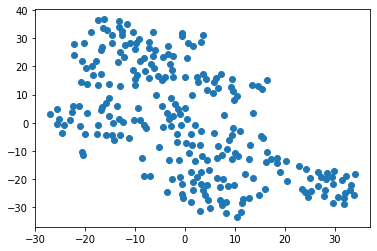

In [ ]:
plt.scatter(Y[:, 0], Y[:, 1])


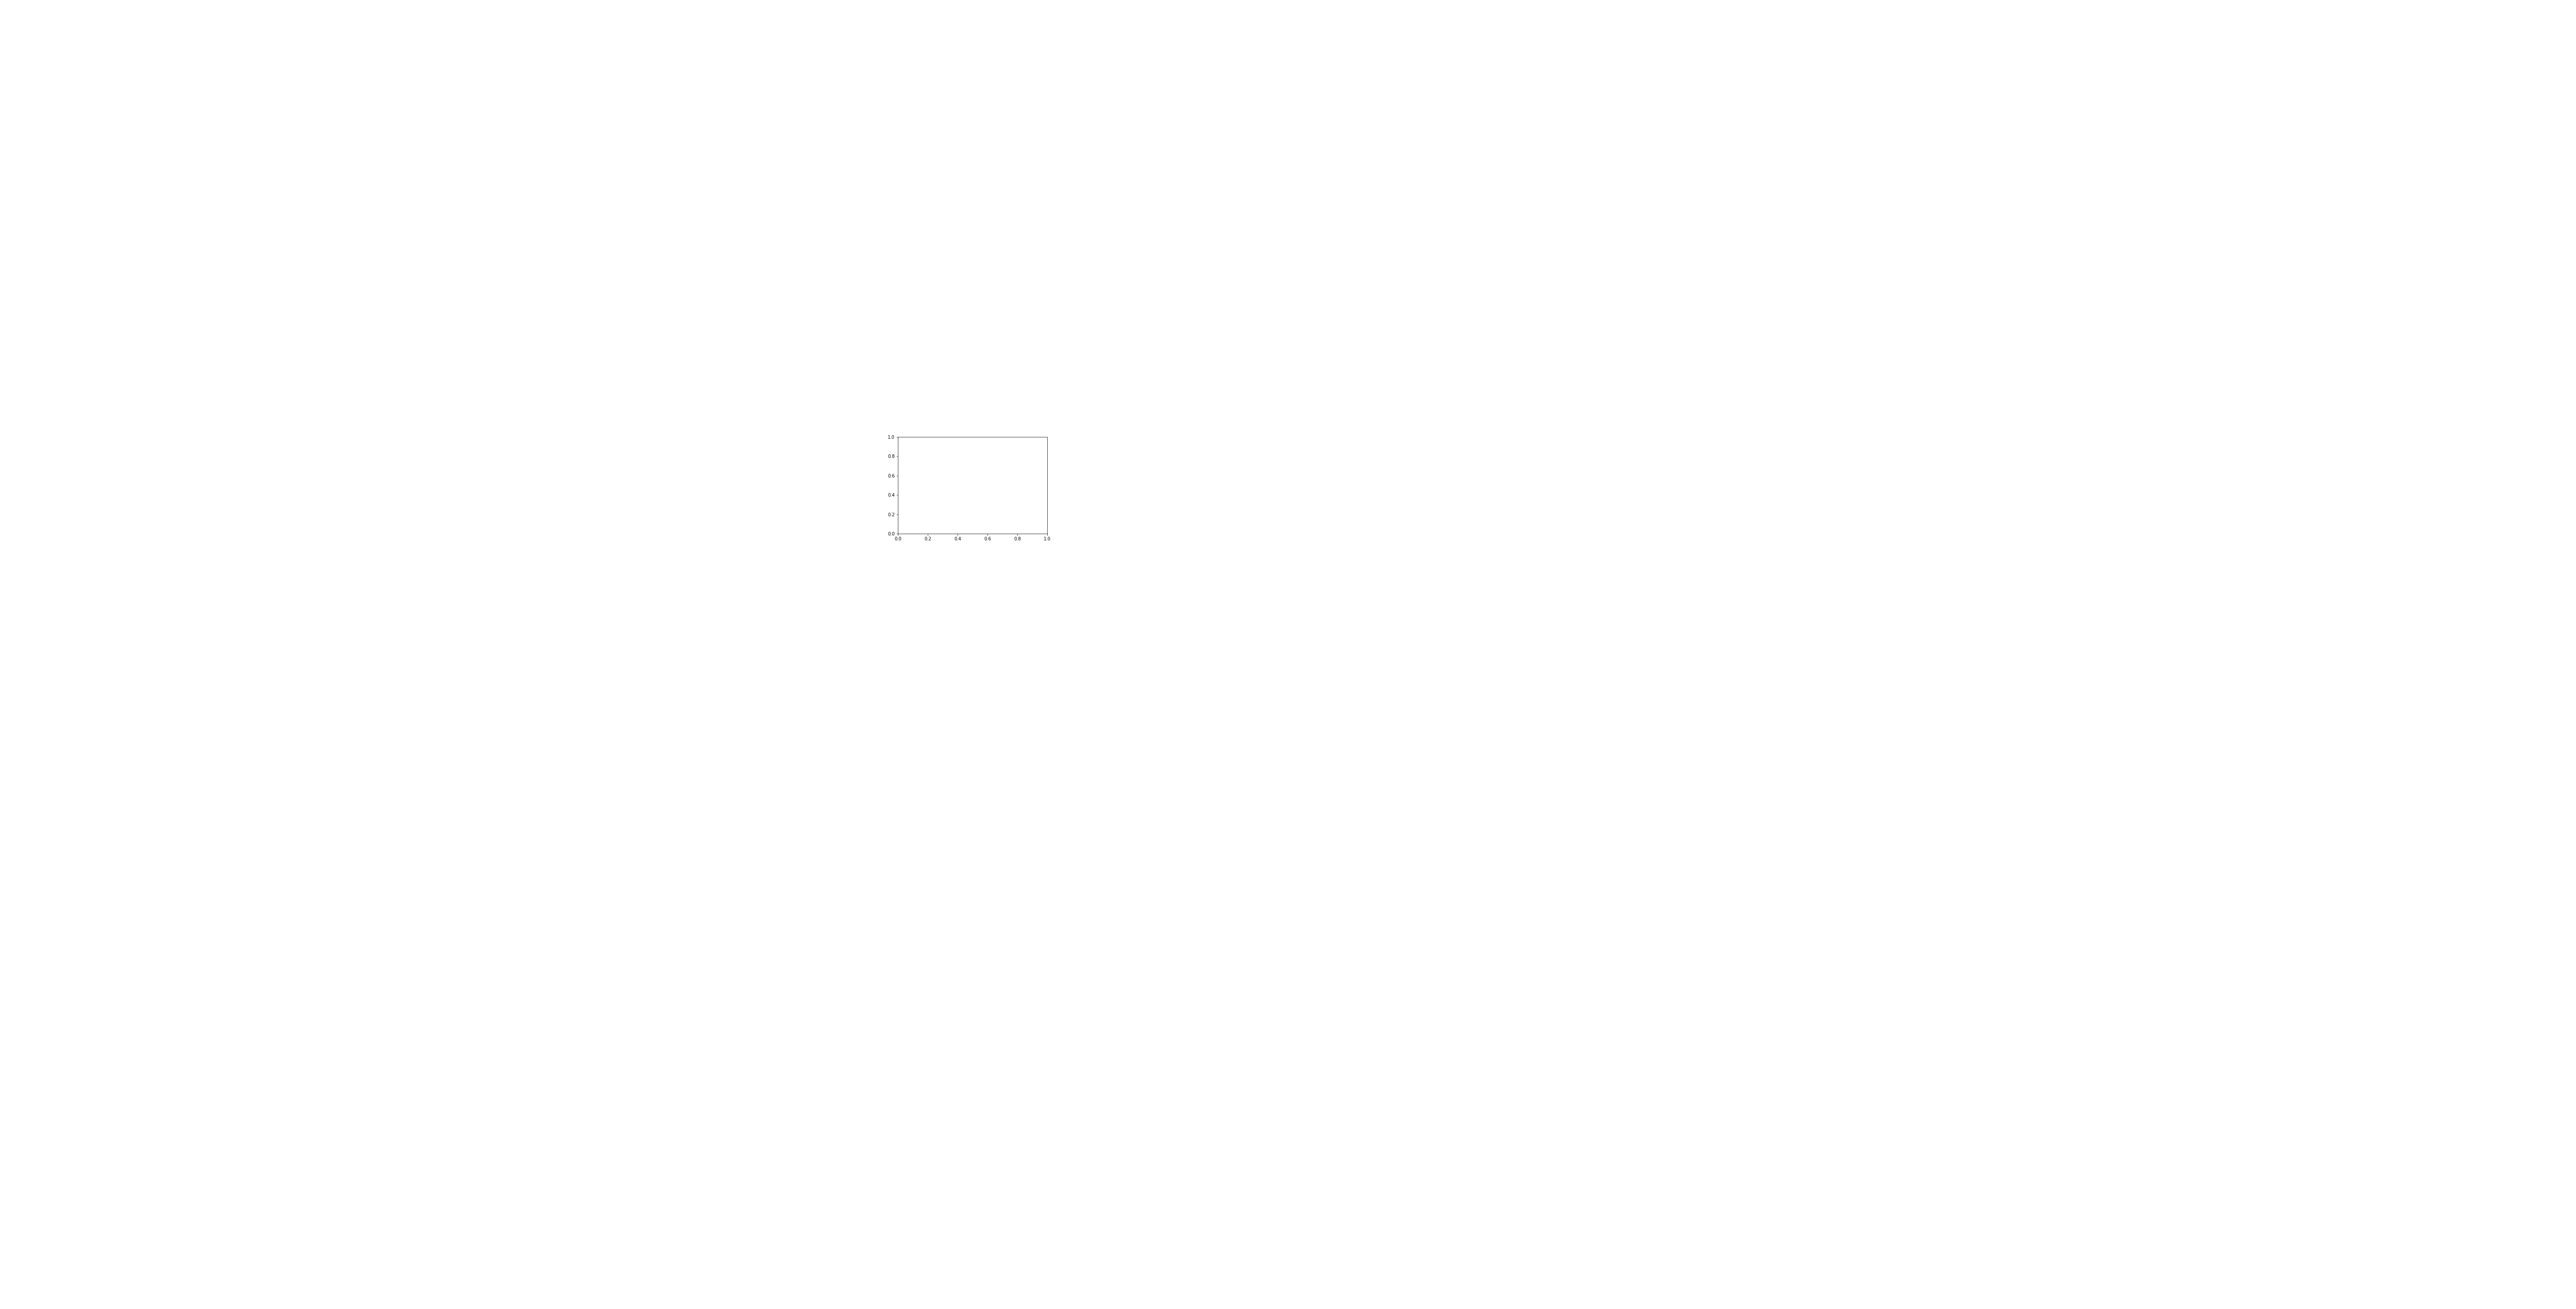

In [ ]:
words = ['choosing', 'instead', 'fortune', 'America;']
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()